In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [254]:
data = pd.read_csv("E:\data_stocks.csv")

In [255]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.61,42.33,143.68,129.63,82.04,102.23,85.22,59.76,121.52,...,84.37,119.03,44.40,39.88,82.03,7.36,50.22,63.86,122.00,53.35
1,1491226260,2364.10,42.36,143.70,130.32,82.08,102.14,85.65,59.84,121.48,...,84.37,119.03,44.11,39.88,82.03,7.38,50.22,63.74,121.77,53.35
2,1491226320,2362.68,42.31,143.69,130.22,82.03,102.21,85.51,59.80,121.93,...,84.58,119.26,44.09,39.98,82.02,7.36,50.12,63.75,121.70,53.37
3,1491226380,2364.31,42.37,143.64,130.07,82.00,102.14,85.49,59.62,121.44,...,84.46,119.26,44.25,39.99,82.02,7.35,50.16,63.88,121.70,53.38
4,1491226440,2364.85,42.54,143.66,129.88,82.03,102.06,85.70,59.62,121.60,...,84.47,119.61,44.11,39.96,82.03,7.36,50.20,63.91,121.69,53.24


In [256]:
data.shape

(41266, 502)

In [257]:
X = data.iloc[:, 2:503]
X.shape

(41266, 500)

In [258]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_train = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

In [259]:
explained_variance

array([0.66751335, 0.15499104, 0.08432464, 0.03526572])

In [260]:
PC1_Contri = pd.DataFrame(pca.components_)
PC1_Contri.columns = data.columns[2:503]
PC1_Contri

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.01,-0.02,-0.04,-0.00,-0.01,-0.05,0.02,-0.03,-0.01,-0.00,...,-0.03,0.05,-0.01,-0.01,0.01,-0.06,-0.02,-0.02,-0.00,-0.02
1,-0.02,0.01,0.01,-0.01,0.02,-0.02,0.00,0.08,-0.01,0.00,...,-0.03,-0.00,0.00,-0.00,-0.01,0.05,0.02,-0.00,-0.04,-0.02
2,0.01,-0.03,-0.01,-0.01,0.03,-0.04,0.03,0.06,-0.01,0.01,...,-0.00,0.01,-0.01,0.00,0.01,0.01,-0.00,-0.02,0.02,-0.02
3,0.03,-0.10,-0.02,0.00,-0.02,-0.04,0.02,-0.05,-0.01,0.01,...,-0.00,-0.09,-0.01,0.01,0.01,0.06,-0.01,-0.01,0.09,0.00


In [261]:
df = PC1_Contri.T
df.columns = ['PC-1', 'PC-2', 'PC-3', 'PC-4']

In [262]:
df[['PC-1']].sort_values(['PC-1'], ascending=False)[0:10]

,PC-1
NYSE.AZO,0.43
NYSE.CMG,0.29
NASDAQ.ORLY,0.15
NYSE.AAP,0.10
NYSE.GWW,0.09
NASDAQ.ULTA,0.09
NYSE.PXD,0.08
NYSE.BLL,0.08
NYSE.FL,0.07
NYSE.XEC,0.05


In [263]:
df[['PC-2']].sort_values(['PC-2'], ascending=False)[0:10]

,PC-2
NASDAQ.CHTR,0.19
NYSE.BA,0.13
NASDAQ.BIIB,0.11
NASDAQ.ALXN,0.08
NASDAQ.SNI,0.07
NASDAQ.VRTX,0.07
NYSE.LMT,0.07
NYSE.RL,0.06
NYSE.COL,0.06
NYSE.AMG,0.05


In [264]:
df[['PC-3']].sort_values(['PC-3'], ascending=False)[0:10]

,PC-3
NASDAQ.PCLN,0.75
NYSE.AYI,0.13
NYSE.AGN,0.12
NYSE.GWW,0.08
NASDAQ.BIIB,0.08
NYSE.BLL,0.08
NYSE.PXD,0.07
NASDAQ.ALXN,0.06
NYSE.AMG,0.06
NYSE.URI,0.06


In [265]:
df[['PC-4']].sort_values(['PC-4'], ascending=False)[0:10]

,PC-4
NASDAQ.REGN,0.22
NYSE.ADS,0.15
NYSE.BLK,0.13
NYSE.GWW,0.13
NYSE.MCK,0.12
NYSE.FDX,0.12
NYSE.PXD,0.11
NYSE.SHW,0.10
NYSE.ZBH,0.09
NYSE.AYI,0.09


In [266]:
pd.options.display.float_format = '{:.2f}'.format
del data['DATE']
del data['SP500']
col_names = list(data)

In [267]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = MinMaxScaler(copy=True, feature_range=(-1, 1))
data = pd.DataFrame(sc_X.fit_transform(data))

In [268]:
data_T = data.T
data_T.index=col_names

In [269]:
data_T.head()

,0,1,2,3,4,5,6,7,8,9,...,41256,41257,41258,41259,41260,41261,41262,41263,41264,41265
NASDAQ.AAL,-0.78,-0.78,-0.78,-0.77,-0.75,-0.75,-0.76,-0.76,-0.77,-0.78,...,-0.43,-0.43,-0.42,-0.43,-0.43,-0.43,-0.43,-0.43,-0.43,-0.43
NASDAQ.AAPL,-0.71,-0.71,-0.71,-0.71,-0.71,-0.70,-0.70,-0.70,-0.70,-0.70,...,0.97,0.96,0.97,0.97,0.97,0.97,0.97,0.96,0.95,0.96
NASDAQ.ADBE,-0.90,-0.85,-0.85,-0.86,-0.88,-0.86,-0.86,-0.86,-0.86,-0.85,...,0.98,0.98,0.98,0.98,0.98,0.98,0.99,0.98,0.97,0.99
NASDAQ.ADI,-0.07,-0.07,-0.08,-0.08,-0.07,-0.07,-0.06,-0.05,-0.05,-0.06,...,0.14,0.14,0.13,0.14,0.13,0.13,0.13,0.13,0.12,0.14
NASDAQ.ADP,-0.51,-0.52,-0.51,-0.52,-0.52,-0.52,-0.50,-0.50,-0.50,-0.50,...,-0.17,-0.17,-0.17,-0.17,-0.17,-0.17,-0.17,-0.18,-0.19,-0.18


In [270]:
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.cluster import KMeans

In [272]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_T)
    wcss.append(kmeans.inertia_)

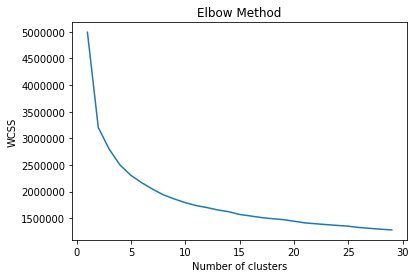

In [273]:
plt.plot(range(1, 30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [274]:
def cluster_data(data_T, n_clusters=8, normalize_data=False):
    if normalize_data:
        data = normalize(data_T.values, norm='l2', axis=1, copy=True)
    cluster_model = KMeans(n_clusters=n_clusters)
    prediction = cluster_model.fit_predict(data_T)
    return prediction, cluster_model, data_T

prediction, model, data_T = cluster_data(data_T, n_clusters=10, normalize_data=True)
data_T["Cluster"] = prediction
data_T

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster
NASDAQ.AAL,-0.78,-0.78,-0.78,-0.77,-0.75,-0.75,-0.76,-0.76,-0.77,-0.78,...,-0.43,-0.42,-0.43,-0.43,-0.43,-0.43,-0.43,-0.43,-0.43,0
NASDAQ.AAPL,-0.71,-0.71,-0.71,-0.71,-0.71,-0.70,-0.70,-0.70,-0.70,-0.70,...,0.96,0.97,0.97,0.97,0.97,0.97,0.96,0.95,0.96,5
NASDAQ.ADBE,-0.90,-0.85,-0.85,-0.86,-0.88,-0.86,-0.86,-0.86,-0.86,-0.85,...,0.98,0.98,0.98,0.98,0.98,0.99,0.98,0.97,0.99,7
NASDAQ.ADI,-0.07,-0.07,-0.08,-0.08,-0.07,-0.07,-0.06,-0.05,-0.05,-0.06,...,0.14,0.13,0.14,0.13,0.13,0.13,0.13,0.12,0.14,5
NASDAQ.ADP,-0.51,-0.52,-0.51,-0.52,-0.52,-0.52,-0.50,-0.50,-0.50,-0.50,...,-0.17,-0.17,-0.17,-0.17,-0.17,-0.17,-0.18,-0.19,-0.18,2
NASDAQ.ADSK,-0.88,-0.85,-0.86,-0.86,-0.85,-0.84,-0.84,-0.84,-0.84,-0.84,...,0.74,0.74,0.74,0.73,0.74,0.74,0.74,0.73,0.73,4
NASDAQ.AKAM,0.69,0.70,0.69,0.67,0.67,0.67,0.66,0.65,0.65,0.63,...,-0.72,-0.72,-0.72,-0.72,-0.72,-0.72,-0.72,-0.72,-0.72,1
NASDAQ.ALXN,0.08,0.08,0.10,0.08,0.09,0.09,0.09,0.09,0.09,0.10,...,0.98,1.00,1.00,0.99,0.98,0.98,0.98,0.97,0.98,8
NASDAQ.AMAT,-0.70,-0.70,-0.72,-0.73,-0.72,-0.71,-0.71,-0.71,-0.72,-0.72,...,0.49,0.49,0.49,0.48,0.48,0.48,0.48,0.47,0.48,4
NASDAQ.AMD,0.64,0.67,0.65,0.65,0.66,0.66,0.66,0.67,0.67,0.65,...,0.08,0.08,0.08,0.08,0.08,0.08,0.07,0.07,0.08,8


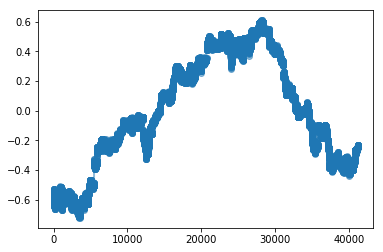

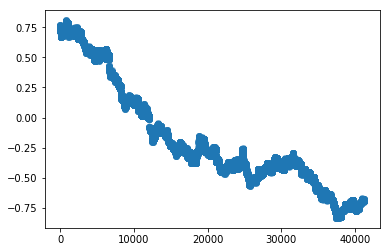

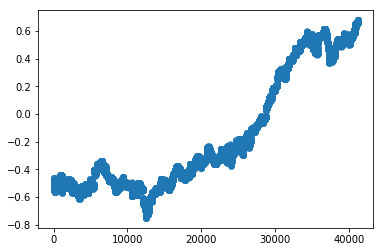

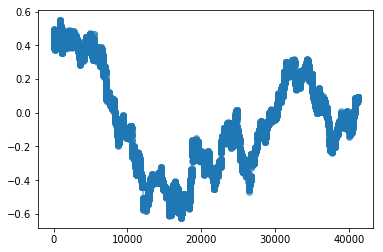

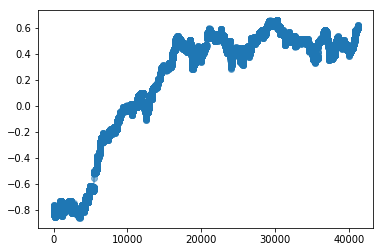

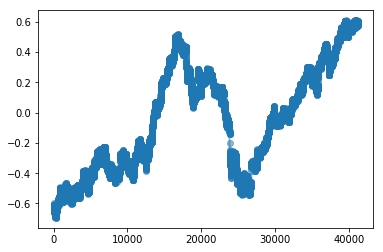

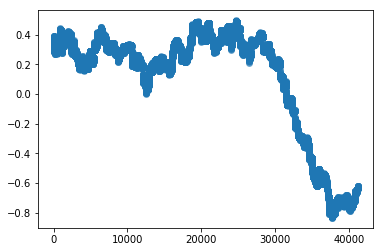

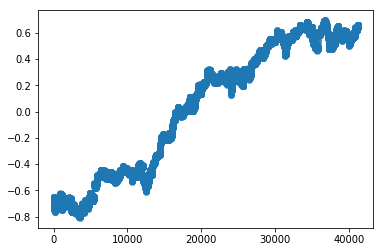

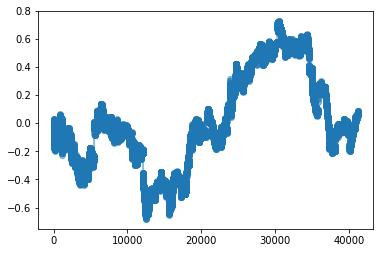

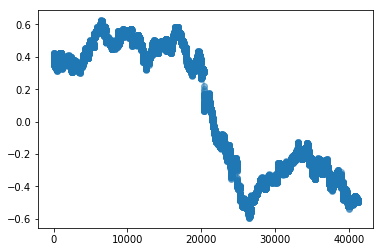

In [275]:
plt.figure

for cluster in np.unique(prediction):
    plt.plot(model.cluster_centers_[cluster], "o-", alpha=0.5, linewidth=2)
    plt.show()
    

Cluster: 0
Members: ['NASDAQ.AAL', 'NASDAQ.AMZN', 'NASDAQ.CA', 'NASDAQ.CSX', 'NASDAQ.HAS', 'NASDAQ.HSIC', 'NASDAQ.IDXX', 'NASDAQ.MU', 'NASDAQ.NTRS', 'NASDAQ.WDC', 'NYSE.ABC', 'NYSE.AIG', 'NYSE.ALLE', 'NYSE.AVB', 'NYSE.BEN', 'NYSE.CHD', 'NYSE.CMI', 'NYSE.COH', 'NYSE.COTY', 'NYSE.DAL', 'NYSE.DRI', 'NYSE.FBHS', 'NYSE.GLW', 'NYSE.HCN', 'NYSE.HD', 'NYSE.IP', 'NYSE.IR', 'NYSE.ITW', 'NYSE.IVZ', 'NYSE.KEY', 'NYSE.LUV', 'NYSE.MCK', 'NYSE.MDT', 'NYSE.MPC', 'NYSE.MRK', 'NYSE.MTB', 'NYSE.NSC', 'NYSE.NWL', 'NYSE.PM', 'NYSE.SEE', 'NYSE.SHW', 'NYSE.SWK', 'NYSE.UTX', 'NYSE.VTR', 'NYSE.WHR', 'NYSE.XL', 'NYSE.ZBH']


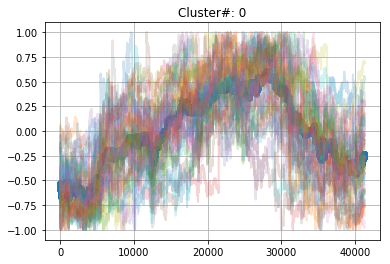

Cluster: 1
Members: ['NASDAQ.AKAM', 'NASDAQ.BBBY', 'NASDAQ.CHRW', 'NASDAQ.CSCO', 'NASDAQ.DISCA', 'NASDAQ.FAST', 'NASDAQ.FFIV', 'NASDAQ.FOX', 'NASDAQ.FOXA', 'NASDAQ.STX', 'NASDAQ.SYMC', 'NASDAQ.TRIP', 'NASDAQ.TSCO', 'NASDAQ.VIAB', 'NYSE.ADM', 'NYSE.APC', 'NYSE.AZO', 'NYSE.BLL', 'NYSE.BXP', 'NYSE.CHK', 'NYSE.COP', 'NYSE.DFS', 'NYSE.DIS', 'NYSE.DPS', 'NYSE.DVN', 'NYSE.EOG', 'NYSE.FLR', 'NYSE.FTI', 'NYSE.GE', 'NYSE.GWW', 'NYSE.HAL', 'NYSE.HOG', 'NYSE.HP', 'NYSE.IBM', 'NYSE.KMI', 'NYSE.M', 'NYSE.MAC', 'NYSE.MOS', 'NYSE.MRO', 'NYSE.NBL', 'NYSE.NFX', 'NYSE.NOV', 'NYSE.PSA', 'NYSE.RIG', 'NYSE.RRC', 'NYSE.SLB', 'NYSE.T', 'NYSE.XEC']


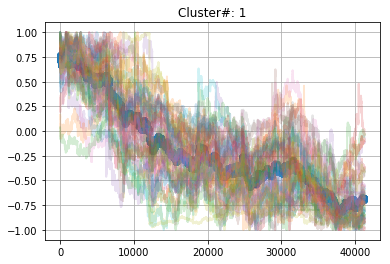

Cluster: 2
Members: ['NASDAQ.ADP', 'NASDAQ.BIIB', 'NASDAQ.CBOE', 'NASDAQ.CHTR', 'NASDAQ.CINF', 'NASDAQ.CTAS', 'NASDAQ.FB', 'NASDAQ.FITB', 'NASDAQ.GILD', 'NASDAQ.ILMN', 'NASDAQ.JBHT', 'NASDAQ.NDAQ', 'NASDAQ.NFLX', 'NASDAQ.SNI', 'NASDAQ.SNPS', 'NASDAQ.TROW', 'NASDAQ.VRSN', 'NASDAQ.VRTX', 'NYSE.AIV', 'NYSE.ALB', 'NYSE.AMG', 'NYSE.AMP', 'NYSE.AMT', 'NYSE.BA', 'NYSE.BBT', 'NYSE.BMY', 'NYSE.BRK.B', 'NYSE.CF', 'NYSE.COL', 'NYSE.DHI', 'NYSE.DOV', 'NYSE.DXC', 'NYSE.EFX', 'NYSE.FCX', 'NYSE.FE', 'NYSE.FMC', 'NYSE.HBI', 'NYSE.HRS', 'NYSE.IRM', 'NYSE.KORS', 'NYSE.L', 'NYSE.LH', 'NYSE.LLL', 'NYSE.LMT', 'NYSE.MCO', 'NYSE.NEM', 'NYSE.NRG', 'NYSE.PG', 'NYSE.PNC', 'NYSE.PSX', 'NYSE.PVH', 'NYSE.RHT', 'NYSE.RTN', 'NYSE.TSS', 'NYSE.TWX', 'NYSE.UNM', 'NYSE.V', 'NYSE.VFC', 'NYSE.WM', 'NYSE.XYL']


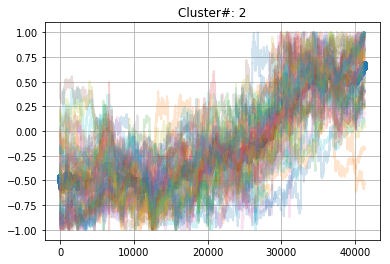

Cluster: 3
Members: ['NASDAQ.ESRX', 'NASDAQ.INCY', 'NYSE.AN', 'NYSE.CBS', 'NYSE.COF', 'NYSE.CVS', 'NYSE.CVX', 'NYSE.EQT', 'NYSE.EXR', 'NYSE.FRT', 'NYSE.GPS', 'NYSE.HST', 'NYSE.KIM', 'NYSE.KSS', 'NYSE.LLY', 'NYSE.LYB', 'NYSE.MUR', 'NYSE.NLSN', 'NYSE.O', 'NYSE.OKE', 'NYSE.OXY', 'NYSE.PFE', 'NYSE.PWR', 'NYSE.REG', 'NYSE.RL', 'NYSE.SIG', 'NYSE.SPG', 'NYSE.SYF', 'NYSE.TSN', 'NYSE.URI', 'NYSE.VZ', 'NYSE.WU']


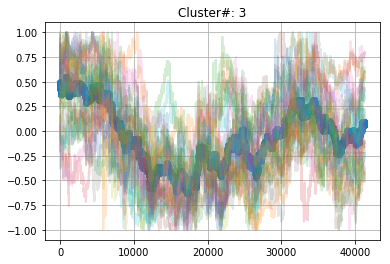

Cluster: 4
Members: ['NASDAQ.ADSK', 'NASDAQ.AMAT', 'NASDAQ.AVGO', 'NASDAQ.CERN', 'NASDAQ.CTSH', 'NASDAQ.EA', 'NASDAQ.EXPE', 'NASDAQ.FISV', 'NASDAQ.GOOG', 'NASDAQ.GOOGL', 'NASDAQ.INTU', 'NASDAQ.ISRG', 'NASDAQ.LKQ', 'NASDAQ.LRCX', 'NASDAQ.MAR', 'NASDAQ.REGN', 'NASDAQ.WFM', 'NASDAQ.WLTW', 'NASDAQ.WYNN', 'NASDAQ.XLNX', 'NYSE.AET', 'NYSE.AIZ', 'NYSE.AME', 'NYSE.ANTM', 'NYSE.APD', 'NYSE.ARE', 'NYSE.BAX', 'NYSE.BCR', 'NYSE.BSX', 'NYSE.DE', 'NYSE.DGX', 'NYSE.DLPH', 'NYSE.ECL', 'NYSE.EQR', 'NYSE.ESS', 'NYSE.EW', 'NYSE.GD', 'NYSE.GPN', 'NYSE.HON', 'NYSE.KMX', 'NYSE.KO', 'NYSE.MAS', 'NYSE.MCD', 'NYSE.MMM', 'NYSE.MON', 'NYSE.PKI', 'NYSE.PRGO', 'NYSE.PX', 'NYSE.ROK', 'NYSE.ROP', 'NYSE.TDG', 'NYSE.TMO', 'NYSE.UDR', 'NYSE.VAR', 'NYSE.WAT', 'NYSE.WRK', 'NYSE.WYN', 'NYSE.YUM', 'NYSE.ZTS']


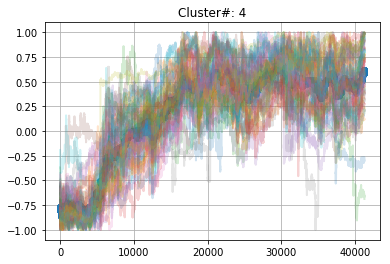

Cluster: 5
Members: ['NASDAQ.AAPL', 'NASDAQ.ADI', 'NASDAQ.CMCSA', 'NASDAQ.EQIX', 'NASDAQ.FLIR', 'NASDAQ.GRMN', 'NASDAQ.MCHP', 'NASDAQ.QRVO', 'NASDAQ.SWKS', 'NASDAQ.TXN', 'NYSE.AEE', 'NYSE.AEP', 'NYSE.APH', 'NYSE.BF.B', 'NYSE.CCI', 'NYSE.CLX', 'NYSE.CMS', 'NYSE.CNP', 'NYSE.CRM', 'NYSE.D', 'NYSE.DG', 'NYSE.DLR', 'NYSE.DTE', 'NYSE.DUK', 'NYSE.ED', 'NYSE.EIX', 'NYSE.ES', 'NYSE.ETR', 'NYSE.HPQ', 'NYSE.IFF', 'NYSE.LNT', 'NYSE.MAA', 'NYSE.PCG', 'NYSE.PEG', 'NYSE.PEP', 'NYSE.PNW', 'NYSE.PPL', 'NYSE.RAI', 'NYSE.SRE', 'NYSE.WEC', 'NYSE.WMT', 'NYSE.XEL']


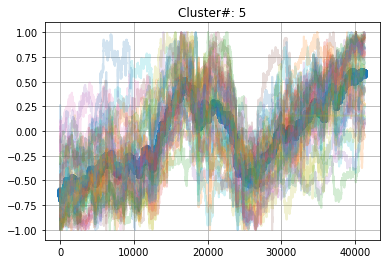

Cluster: 6
Members: ['NASDAQ.DISCK', 'NASDAQ.DISH', 'NASDAQ.GT', 'NASDAQ.HOLX', 'NASDAQ.MAT', 'NASDAQ.MYL', 'NASDAQ.NAVI', 'NASDAQ.PAYX', 'NASDAQ.PBCT', 'NASDAQ.PDCO', 'NASDAQ.QCOM', 'NASDAQ.SBUX', 'NASDAQ.ULTA', 'NASDAQ.XRAY', 'NYSE.ADS', 'NYSE.ALK', 'NYSE.APA', 'NYSE.CAH', 'NYSE.CFG', 'NYSE.CL', 'NYSE.CTL', 'NYSE.CXO', 'NYSE.DHR', 'NYSE.DVA', 'NYSE.ETN', 'NYSE.EVHC', 'NYSE.F', 'NYSE.FLS', 'NYSE.GGP', 'NYSE.HCA', 'NYSE.HCP', 'NYSE.IPG', 'NYSE.JCI', 'NYSE.JEC', 'NYSE.KMB', 'NYSE.LB', 'NYSE.LEG', 'NYSE.LVLT', 'NYSE.MET', 'NYSE.MLM', 'NYSE.MO', 'NYSE.NUE', 'NYSE.OMC', 'NYSE.PNR', 'NYSE.PPG', 'NYSE.PXD', 'NYSE.RHI', 'NYSE.SCG', 'NYSE.SLG', 'NYSE.TIF', 'NYSE.UA', 'NYSE.UAA', 'NYSE.UAL', 'NYSE.UHS', 'NYSE.UNP', 'NYSE.VMC', 'NYSE.VNO', 'NYSE.WFC', 'NYSE.WY', 'NYSE.XOM']


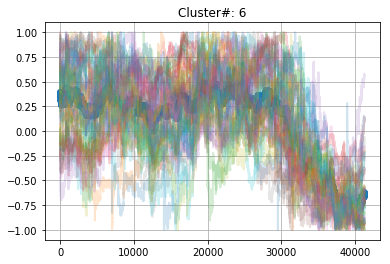

Cluster: 7
Members: ['NASDAQ.ADBE', 'NASDAQ.ATVI', 'NASDAQ.CME', 'NASDAQ.EBAY', 'NASDAQ.ETFC', 'NASDAQ.MNST', 'NASDAQ.MSFT', 'NASDAQ.NVDA', 'NASDAQ.NWS', 'NASDAQ.NWSA', 'NASDAQ.PYPL', 'NASDAQ.ZION', 'NYSE.A', 'NYSE.ABBV', 'NYSE.ABT', 'NYSE.ACN', 'NYSE.AFL', 'NYSE.AJG', 'NYSE.ALL', 'NYSE.AON', 'NYSE.AVY', 'NYSE.AWK', 'NYSE.AXP', 'NYSE.BBY', 'NYSE.BDX', 'NYSE.BK', 'NYSE.BLK', 'NYSE.BWA', 'NYSE.C', 'NYSE.CAT', 'NYSE.CB', 'NYSE.CCL', 'NYSE.CI', 'NYSE.CNC', 'NYSE.COO', 'NYSE.CSRA', 'NYSE.EL', 'NYSE.EMN', 'NYSE.EXC', 'NYSE.FDX', 'NYSE.FIS', 'NYSE.FTV', 'NYSE.HIG', 'NYSE.HRB', 'NYSE.HUM', 'NYSE.ICE', 'NYSE.IT', 'NYSE.JNJ', 'NYSE.KSU', 'NYSE.MA', 'NYSE.MHK', 'NYSE.MMC', 'NYSE.MS', 'NYSE.NEE', 'NYSE.NI', 'NYSE.NOC', 'NYSE.ORCL', 'NYSE.PGR', 'NYSE.PHM', 'NYSE.PLD', 'NYSE.RCL', 'NYSE.RSG', 'NYSE.SPGI', 'NYSE.STT', 'NYSE.STZ', 'NYSE.SYK', 'NYSE.TEL', 'NYSE.TRV', 'NYSE.TSO', 'NYSE.UNH', 'NYSE.UPS', 'NYSE.XRX']


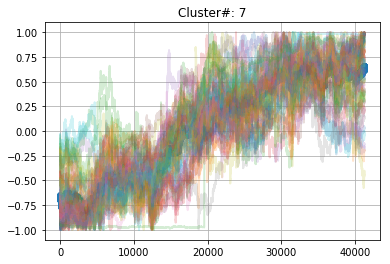

Cluster: 8
Members: ['NASDAQ.ALXN', 'NASDAQ.AMD', 'NASDAQ.AMGN', 'NASDAQ.CELG', 'NASDAQ.EXPD', 'NASDAQ.HBAN', 'NASDAQ.NTAP', 'NASDAQ.PCAR', 'NASDAQ.PCLN', 'NASDAQ.SPLS', 'NASDAQ.VRSK', 'NYSE.AGN', 'NYSE.AYI', 'NYSE.BAC', 'NYSE.CBG', 'NYSE.CMA', 'NYSE.COG', 'NYSE.DD', 'NYSE.DOW', 'NYSE.EMR', 'NYSE.GM', 'NYSE.GS', 'NYSE.JPM', 'NYSE.JWN', 'NYSE.LEN', 'NYSE.LNC', 'NYSE.LUK', 'NYSE.MNK', 'NYSE.MSI', 'NYSE.NKE', 'NYSE.PFG', 'NYSE.PH', 'NYSE.PRU', 'NYSE.RF', 'NYSE.RJF', 'NYSE.SCHW', 'NYSE.STI', 'NYSE.TMK', 'NYSE.TXT', 'NYSE.USB', 'NYSE.VLO', 'NYSE.WMB']


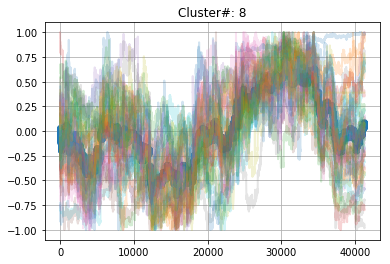

Cluster: 9
Members: ['NASDAQ.COST', 'NASDAQ.CTXS', 'NASDAQ.DLTR', 'NASDAQ.INFO', 'NASDAQ.INTC', 'NASDAQ.KHC', 'NASDAQ.KLAC', 'NASDAQ.MDLZ', 'NASDAQ.ORLY', 'NASDAQ.ROST', 'NASDAQ.SRCL', 'NASDAQ.WBA', 'NYSE.AAP', 'NYSE.AES', 'NYSE.ARNC', 'NYSE.BHI', 'NYSE.CAG', 'NYSE.CMG', 'NYSE.CPB', 'NYSE.FL', 'NYSE.GIS', 'NYSE.GPC', 'NYSE.HES', 'NYSE.HPE', 'NYSE.HRL', 'NYSE.HSY', 'NYSE.JNPR', 'NYSE.K', 'NYSE.KR', 'NYSE.LOW', 'NYSE.MKC', 'NYSE.SJM', 'NYSE.SNA', 'NYSE.SO', 'NYSE.SYY', 'NYSE.TAP', 'NYSE.TGT', 'NYSE.TJX']


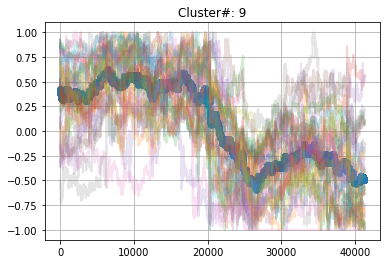

In [276]:
c_data = data_T
    
for cluster in np.unique(prediction):
    temp_cluster_data = c_data[c_data["Cluster"]==cluster]
    print("Cluster:", cluster)
    print("Members:", [(symbol) for symbol in list(temp_cluster_data.index)])
    plt.figure()
    plt.title("Cluster#: %s" % cluster)
    plt.plot(model.cluster_centers_[cluster], "o--", alpha=0.5, linewidth=2)
    for symbol in temp_cluster_data.index:
        plt.plot(np.ravel(temp_cluster_data.loc[[symbol]].drop("Cluster", 1).values),
                 alpha=0.2, linewidth=2)

    plt.grid()
    plt.show();